#import beberapa library

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Lakukan Instalasi jcopml

In [2]:
!pip install jcopml 

     |████████████████████████████████| 81kB 3.2MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.7-py2.py3-none-any.whl size=26673 sha256=65ade0423e9381bdd7b0a52a3761af7ff80e0a1f2a8fb7b2bb7f78ec98e87816
  Stored in directory: /root/.cache/pip/wheels/4c/6d/1a/efa8fdc55a69e514afec5d581c11a01b86ca82df3b4bc97dd9
Successfully built jcopml


#Lakukan Upload File

In [3]:
from google.colab import files
files.upload()

Saving corona.xlsx to corona.xlsx


{'corona.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfn\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

# Baca file yang sudah diupload dengan pandas

In [4]:
df = pd.read_excel("corona.xlsx")
df.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,international_traveler,domestic_traveler,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,2020-03-01 00:00:00,0.0,2020-11-01 00:00:00,NaN,NaN,12/29/2019,2020-04-01 00:00:00,NaN,1.0,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,1/15/2020,0.0,1/15/2020,NaN,NaN,NaN,2020-12-01 00:00:00,NaN,0.0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,2020-04-01 00:00:00,0.0,1/17/2020,NaN,NaN,NaN,2020-03-01 00:00:00,NaN,0.0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,NaN,NaN,1/19/2020,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58,NaN,NaN,1/14/2020,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


#plot missing value pada dataset

In [5]:
from jcopml.plot import plot_missing_value

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


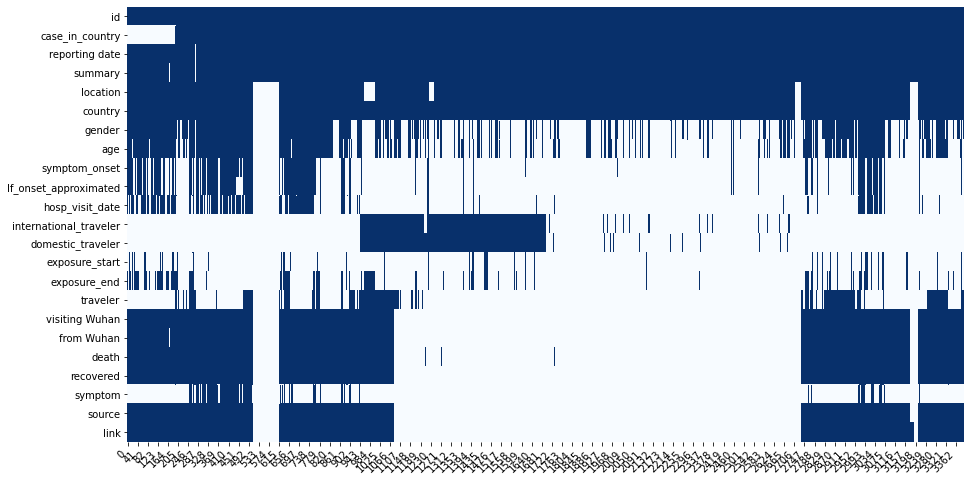

In [6]:
plot_missing_value(df)

#drop Na value dengan acuan kolom "symptom"

In [0]:
df.dropna(subset=["symptom"],inplace=True)

In [8]:
df.shape

(338, 23)

#drop Kolom yang tidak digunakan

In [0]:
df.drop(columns=["international_traveler","domestic_traveler","exposure_start","exposure_end","traveler"],inplace=True)

In [10]:
df.drop(columns=["source","link"],inplace=True)
df.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,visiting Wuhan,from Wuhan,death,recovered,symptom
194,195,NaN,1/27/2020,new recovered COVID-19 pneumonia patient in Hu...,Hubei,China,female,28,2020-07-01 00:00:00,0.0,2020-10-01 00:00:00,0.0,1.0,0,1,"feaver, cough, difficult in breathing"
195,196,NaN,1/27/2020,new recovered COVID-19 pneumonia patient in Hu...,Hubei,China,female,51,NaN,NaN,2020-11-01 00:00:00,0.0,1.0,0,1,"feaver, cough, difficult in breathing"
196,197,NaN,1/27/2020,new recovered COVID-19 pneumonia patient in Sh...,Shandong,China,male,37,NaN,NaN,1/17/2020,0.0,1.0,0,1,fever
253,254,1.0,1/15/2020,"new confirmed COVID-19 patient in Japan: male,...",Kanagawa,Japan,male,35,2020-03-01 00:00:00,0.0,2020-06-01 00:00:00,1.0,0.0,0,1/15/2020,fever
257,258,5.0,1/28/2020,"new confirmed COVID-19 patient in Japan: male,...",Aichi Prefecture,Japan,male,45,1/22/2020,0.0,1/26/2020,0.0,1.0,0,0,fever


#Reset Inde pada Dataset

In [0]:
df.reset_index(drop=True,inplace=True)

# Proses tanggal pada Dataset

In [0]:
def editTanggal(x):
    print(x)
    bulan = x.month
    hari = x.day
    tahun = x.year
    if bulan > 3:
        x = "{}-{}-{}".format(tahun,hari,bulan)
        x = pd.to_datetime(x)
    else:
        pass
    return x


In [0]:
df["symptom_onset"] = pd.to_datetime(df['symptom_onset'], infer_datetime_format=True)
df["hosp_visit_date"] = pd.to_datetime(df['hosp_visit_date'], infer_datetime_format=True)

In [0]:
df["reporting date"] = pd.to_datetime(df['reporting date'], infer_datetime_format=True)

In [0]:
def editTanggal(x):
    bulan = x.month
    hari = x.day
    tahun = x.year
    if bulan > 3:
        x = "{}-{}-{}".format(tahun,hari,bulan)
        x = pd.to_datetime(x)
    else:
        pass
    return x

In [0]:
df["symptom_onset"] = df.symptom_onset.apply(editTanggal)

In [0]:
df["hosp_visit_date"] = df.hosp_visit_date.apply(editTanggal)

#Buat kolom baru, yang berisi selisih hari antara kolom "hosp_visit_date" dan "symptom_onset"

In [0]:
df["selisihPenanganan"] =df['hosp_visit_date'].sub(df['symptom_onset'], axis=0)

In [0]:
df["selisihPenanganan"] = df["selisihPenanganan"]/np.timedelta64(1, 'D')

In [20]:
df["selisihPenanganan"].value_counts()

 0.0     76
 1.0     58
 2.0     24
 3.0     22
 4.0     17
 5.0      8
 6.0      7
 8.0      5
 7.0      4
 10.0     3
-27.0     3
 11.0     2
 35.0     2
-23.0     2
-24.0     2
 9.0      2
-28.0     2
 33.0     2
-6.0      1
-55.0     1
-21.0     1
 31.0     1
 60.0     1
 34.0     1
 38.0     1
 12.0     1
-25.0     1
-57.0     1
-1.0      1
-50.0     1
-5.0      1
-26.0     1
 13.0     1
Name: selisihPenanganan, dtype: int64

#Cek format tanggal berdasarkan hasil selisih diatas, karena nilainya banyak yang noise

In [21]:
print(len(df[(df["selisihPenanganan"]<-14)|(df["selisihPenanganan"]>14)]))
ganti = [1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1]

23


In [0]:
nilaiulang = 0
def cekTanggalUlang(x):
    global nilaiulang
    if ganti[nilaiulang]==1:
        bulan = x.month
        hari = x.day
        tahun = x.year
        x = "{}-{}-{}".format(tahun,hari,bulan)
        x = pd.to_datetime(x)
    else:
        pass
    nilaiulang+=1
    return x

In [0]:
df.loc[(df["selisihPenanganan"]<-14)|(df["selisihPenanganan"]>14),"symptom_onset"]= df[(df["selisihPenanganan"]<-14)|(df["selisihPenanganan"]>14)]["symptom_onset"].apply(cekTanggalUlang)

In [0]:
ganti2=[0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0]


In [0]:
nilaiulang = 0
def cekTanggalUlang(x):
    global nilaiulang
    if ganti2[nilaiulang]==1:
        bulan = x.month
        hari = x.day
        tahun = x.year
        x = "{}-{}-{}".format(tahun,hari,bulan)
        x = pd.to_datetime(x)
    else:
        pass
    nilaiulang+=1
    return x
df.loc[(df["selisihPenanganan"]<-14)|(df["selisihPenanganan"]>14),"hosp_visit_date"]= df[(df["selisihPenanganan"]<-14)|(df["selisihPenanganan"]>14)]["hosp_visit_date"].apply(cekTanggalUlang)

In [26]:
df[(df["selisihPenanganan"]<-14)|(df["selisihPenanganan"]>14)]

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,visiting Wuhan,from Wuhan,death,recovered,symptom,selisihPenanganan
3,254,1.0,2020-01-15,"new confirmed COVID-19 patient in Japan: male,...",Kanagawa,Japan,male,35,2020-01-03,0.0,2020-01-06,1.0,0.0,0,1/15/2020,fever,-55.0
23,284,31.0,2020-02-14,"new confirmed COVID-19 patient in Japan: male,...",Japan,Japan,male,75,2020-02-01,0.0,2020-02-06,0.0,0.0,2/28/2020,0,"cold, fever, pneumonia",35.0
27,288,35.0,2020-02-14,"new confirmed COVID-19 patient in Japan: male,...",Aichi Prefecture,Japan,male,65,2020-02-03,0.0,2020-02-08,0.0,0.0,0,0,fever,-23.0
34,298,45.0,2020-02-16,"new confirmed COVID-19 patient in Japan: male,...",Tokyo,Japan,male,35,2020-02-03,0.0,2020-02-04,0.0,0.0,0,0,"fever, malaise",-27.0
38,304,51.0,2020-02-17,"new confirmed COVID-19 patient in Japan: male,...",Wakayama Prefecture,Japan,male,55,2020-02-03,0.0,2020-02-04,0.0,0.0,0,0,fever,-27.0
47,315,62.0,2020-02-19,"new confirmed COVID-19 patient in Japan: male,...",Kanagawa,Japan,male,65,2020-02-03,0.0,2020-02-05,0.0,0.0,0,0,fever,-26.0
49,317,64.0,2020-02-19,"new confirmed COVID-19 patient in Japan: male,...",Hokkaido,Japan,male,65,2020-02-03,0.0,2020-02-07,0.0,0.0,0,0,"fever, sore throat",-24.0
181,474,221.0,2020-01-03,new confirmed COVID-19 patient in Japan: Funab...,Funabashi City,Japan,male,25,2020-02-22,0.0,2020-03-01,0.0,0.0,0,0,"fever, diarrhea, nausea, difficulty breathing,...",-50.0
204,497,244.0,2020-03-03,new confirmed COVID-19 patient in Japan: Sappo...,Sapporo,Japan,female,35,2020-02-29,0.0,2020-03-01,0.0,0.0,0,0,"fever, headache, cough",-57.0
212,505,252.0,2020-03-03,new confirmed COVID-19 patient in Japan: Osaka...,Osaka Prefecture,Japan,female,45,2020-02-26,0.0,2020-03-02,0.0,0.0,0,0,"back pain, fever, runny nose",-23.0


In [0]:
df["selisihPenanganan"] =df['hosp_visit_date'].sub(df['symptom_onset'], axis=0)

In [0]:
df["selisihPenanganan"] = df["selisihPenanganan"]/np.timedelta64(1, 'D')

In [29]:
df["selisihPenanganan"].value_counts()

 0.0     76
 1.0     63
 2.0     28
 3.0     25
 4.0     18
 5.0     12
 6.0      9
 8.0      6
 7.0      6
 10.0     4
 11.0     2
 9.0      2
 12.0     1
-1.0      1
-5.0      1
-6.0      1
 13.0     1
Name: selisihPenanganan, dtype: int64

#pembuatan kolom perawatan

In [0]:
df.loc[(df["death"]!=0),"death"]=1

In [0]:
df.loc[(df["recovered"]!=0),"recovered"]=1

In [0]:
df["perawatan"] = (df["recovered"]|df["death"])==0

In [0]:
df["perawatan"] = df["perawatan"].astype(int)

In [0]:
df.drop(columns=["case_in_country","reporting date","summary","location","symptom_onset","If_onset_approximated","hosp_visit_date"],inplace=True)

In [35]:
df.head()

,id,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,symptom,selisihPenanganan,perawatan
0,195,China,female,28,0.0,1.0,0,1,"feaver, cough, difficult in breathing",3.0,0
1,196,China,female,51,0.0,1.0,0,1,"feaver, cough, difficult in breathing",NaN,0
2,197,China,male,37,0.0,1.0,0,1,fever,NaN,0
3,254,Japan,male,35,1.0,0.0,0,1,fever,3.0,0
4,258,Japan,male,45,0.0,1.0,0,0,fever,4.0,1


#Imputasi kolom selisih penanganan dengan mean

In [0]:
df["selisihPenanganan"].fillna(df["selisihPenanganan"].mean(),inplace=True)

In [37]:
df.head()

,id,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,symptom,selisihPenanganan,perawatan
0,195,China,female,28,0.0,1.0,0,1,"feaver, cough, difficult in breathing",3.000000,0
1,196,China,female,51,0.0,1.0,0,1,"feaver, cough, difficult in breathing",2.199219,0
2,197,China,male,37,0.0,1.0,0,1,fever,2.199219,0
3,254,Japan,male,35,1.0,0.0,0,1,fever,3.000000,0
4,258,Japan,male,45,0.0,1.0,0,0,fever,4.000000,1


#imputasi kolom age dengan mean

In [0]:
df["age"].fillna(df["age"].mean(),inplace=True)

#imputasi kolom gender dengan modus

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")

In [40]:
imputer.fit(df["gender"].values.reshape(-1, 1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [0]:
df["gender"]=imputer.transform(df["gender"].values.reshape(-1, 1))

#simpan dataset

In [0]:
df.to_csv("fix.csv",index=False)

#lakukan pembulatan pada kolom selisihPenanganan

In [0]:
df["selisihPenanganan"] =  df["selisihPenanganan"].apply(np.floor)

In [44]:
df.head()

,id,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,symptom,selisihPenanganan,perawatan
0,195,China,female,28.0,0.0,1.0,0,1,"feaver, cough, difficult in breathing",3.0,0
1,196,China,female,51.0,0.0,1.0,0,1,"feaver, cough, difficult in breathing",2.0,0
2,197,China,male,37.0,0.0,1.0,0,1,fever,2.0,0
3,254,Japan,male,35.0,1.0,0.0,0,1,fever,3.0,0
4,258,Japan,male,45.0,0.0,1.0,0,0,fever,4.0,1


#instalasi library googletrans untuk melakukan penerjemahan pada kolom symptom

In [45]:
!pip install googletrans

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=71e88cd77a6401cdbe74aac815431518a263ebf25f2d37e72710c07d201d3524
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


#deklarasi object untuk class googletrans

In [0]:
from googletrans import Translator
translator = Translator()

#lakukan filtering dan penerjemahan pada kolom symptom

In [0]:
import re
for i in range(len(df)):
  df.loc[i,"symptom"] = re.sub(r" ?\([^)]+\)", "",  df.loc[i, "symptom"])
  kalimat = df.loc[i,"symptom"].split(", ")
  if "feve\\" in kalimat:
    kalimat.remove("feve\\")
    kalimat.append("fever")
  if "feaver" in kalimat:
    kalimat.remove("feaver")
    kalimat.append("fever")
  kalimatbaru = []
  for j in range(len(kalimat)):
    arti = translator.translate(kalimat[j],dest='id', src='en')
    kalimatbaru.append(arti.text)
  df.loc[i,"symptom"] = ",".join(kalimatbaru)
  

#instalasi sastrawi untuk stemming kata bahasa indonesia

In [48]:
!pip install sastrawi

     |████████████████████████████████| 215kB 2.8MB/s 


#stemming kata 

In [0]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

for i in range(len(df)):
  kalimat = df.loc[i,"symptom"].split(",")
  if "nafas yg sulit" in kalimat:
    kalimat.remove("nafas yg sulit")
    kalimat.append("sulit nafas")
  for j in range(len(kalimat)):
    kalimat[j] = stemmer.stem(kalimat[j])
  df.loc[i,"symptom"] = ",".join(kalimat)

In [50]:
df.head()

,id,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,symptom,selisihPenanganan,perawatan
0,195,China,female,28.0,0.0,1.0,0,1,"batuk,sulit nafas,demam",3.0,0
1,196,China,female,51.0,0.0,1.0,0,1,"batuk,sulit nafas,demam",2.0,0
2,197,China,male,37.0,0.0,1.0,0,1,demam,2.0,0
3,254,Japan,male,35.0,1.0,0.0,0,1,demam,3.0,0
4,258,Japan,male,45.0,0.0,1.0,0,0,demam,4.0,1


#ubah kolom gender dalam bahasa indonesia, disini dilakukan manual. karena keterbatasan jumlah load API googletrans yang hanya sebanyak 200 kata/kalimat

In [0]:
for i in range(len(df)):
  if df.loc[i,"gender"]=="female":
    df.loc[i,"gender"] = "wanita"
  else:
    df.loc[i,"gender"] =  "pria"

membuat kolom riwayat yang berisi summary dari kolom age,gender,dan symptom

In [0]:
for i in range(len(df)):
   master_symptoms = \
   "umur"+str(int(df.loc[i, "age"]))+","+\
   df.loc[i, "gender"]+","+\
   df.loc[i, "symptom"]+","+\
   "dpos"+str(int(df.loc[i, "selisihPenanganan"]))
   df.loc[i, "riwayat"] = master_symptoms

In [54]:
df.head()

,id,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,symptom,selisihPenanganan,perawatan,riwayat
0,195,China,wanita,28.0,0.0,1.0,0,1,"batuk,sulit nafas,demam",3.0,0,"umur28,wanita,batuk,sulit nafas,demam,dpos3"
1,196,China,wanita,51.0,0.0,1.0,0,1,"batuk,sulit nafas,demam",2.0,0,"umur51,wanita,batuk,sulit nafas,demam,dpos2"
2,197,China,pria,37.0,0.0,1.0,0,1,demam,2.0,0,"umur37,pria,demam,dpos2"
3,254,Japan,pria,35.0,1.0,0.0,0,1,demam,3.0,0,"umur35,pria,demam,dpos3"
4,258,Japan,pria,45.0,0.0,1.0,0,0,demam,4.0,1,"umur45,pria,demam,dpos4"


#simpan dataset sebagai checkpoint

In [0]:
df.to_csv("siapproses.csv",index=False)

# konversi kolom riwayat menjadi list, karena akan kita akan membuat model menggunakan kolom riwayat ini 

In [0]:
kata = df.riwayat.to_list()
kataFinal = np.array(kata)
listkata = []
for i in kataFinal:
  listkata.append(i.split(","))

In [59]:
listkata

[['umur28', 'wanita', 'batuk', 'sulit nafas', 'demam', 'dpos3'],
 ['umur51', 'wanita', 'batuk', 'sulit nafas', 'demam', 'dpos2'],
 ['umur37', 'pria', 'demam', 'dpos2'],
 ['umur35', 'pria', 'demam', 'dpos3'],
 ['umur45', 'pria', 'demam', 'dpos4'],
 ['umur65', 'pria', 'batuk', 'panas dingin', 'nyeri sendi', 'dpos3'],
 ['umur45', 'wanita', 'demam', 'batuk', 'dpos1'],
 ['umur45', 'wanita', 'demam', 'batuk', 'dpos0'],
 ['umur55', 'pria', 'sakit tenggorok', 'demam', 'dpos2'],
 ['umur55', 'pria', 'demam', 'dpos2'],
 ['umur35', 'wanita', 'demam', 'batuk', 'dpos0'],
 ['umur25', 'wanita', 'demam', 'dpos5'],
 ['umur45', 'pria', 'demam', 'batuk', 'dpos4'],
 ['umur35', 'wanita', 'demam', 'pilek', 'dpos1'],
 ['umur55', 'wanita', 'demam', 'batuk', 'dpos0'],
 ['umur55', 'pria', 'demam', 'dpos1'],
 ['umur25', 'pria', 'demam', 'dpos3'],
 ['umur45', 'pria', 'demam', 'dpos2'],
 ['umur55', 'pria', 'demam', 'batuk', 'dpos0'],
 ['umur85', 'wanita', 'lelah', 'dpos6'],
 ['umur75', 'pria', 'demam', 'dpos0'],
 [

# import library Word2Vec yang digunakan untuk mengubah kata menjadi vector

In [0]:
from gensim.models import Word2Vec

#buat model Word2Vec dengan size=8 (mengubah 1 kata menjadi 8 nilai dalam sebuah vecotr), min_count=2 (jumlah kata minimal sehingga kata akan dianggap dipertahankan sebagai vocab), workers=4, dan iterasi=10

In [0]:
size = 8
w2vModel = Word2Vec(listkata, min_count=2, size=size, workers=4,iter=10)

In [0]:
w2vKata = list(w2vModel.wv.vocab)

#cek nilai contoh dari sebuah kata

In [63]:
w2vModel.wv["demam"]

array([ 0.06944426, -0.07110242, -0.2056168 , -0.06977138, -0.13175826,
        0.0794186 , -0.28437755,  0.16778833], dtype=float32)

cek nilai terdekat dari salah satu contoh gejala

In [64]:
w2vModel.most_similar("radang paru")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('umur45', 0.7578637003898621),
 ('batuk', 0.7519530057907104),
 ('panas dingin', 0.6282804012298584),
 ('dpos2', 0.6168342232704163),
 ('dpos0', 0.5959563851356506),
 ('lelah', 0.5907285213470459),
 ('nyeri dada', 0.5867217779159546),
 ('dpos1', 0.5799081325531006),
 ('sesak napas', 0.5786896347999573),
 ('pria', 0.5779397487640381)]

# mempersiapkan dataset pada untuk di training menggunakan Kmeans

In [65]:
from tqdm import tqdm
sent_vectors = []; 
count_error = 0
for review in tqdm(kataFinal): 
    sent_vec = np.zeros(size)
    cnt_words =0; 
    for word in review.split(","):
        if word in w2vKata:
            vec = w2vModel.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

100%|██████████| 338/338 [00:00<00:00, 20869.03it/s]


In [0]:
X_w2v = np.array(sent_vectors)

In [67]:
X_w2v.shape

(338, 8)

#training model dengan kmeans dan mencari k terbaik dengan elbow method

100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


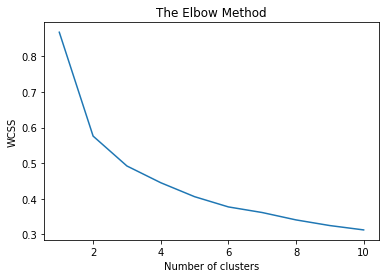

In [68]:
from sklearn.cluster import KMeans
wcss = []
for i in tqdm(range(1,11)):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0, n_jobs = -1)
  kmeans.fit(X_w2v)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#disini K=2 merupakan yang terbaik, tetapi selanjutnya akan digunakan K=3 yang hasilnya hampir sama dengan K=2. karena clustering akan digunakan untuk Menerapkan triase medis (Merah, kuning, hijau)

In [0]:
k = 3
kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0, n_jobs = -1)
Y_kmeans = kmeans.fit_predict(X_w2v)

# lakukan pembuatan wordcloud untuk melihat tiap cluster

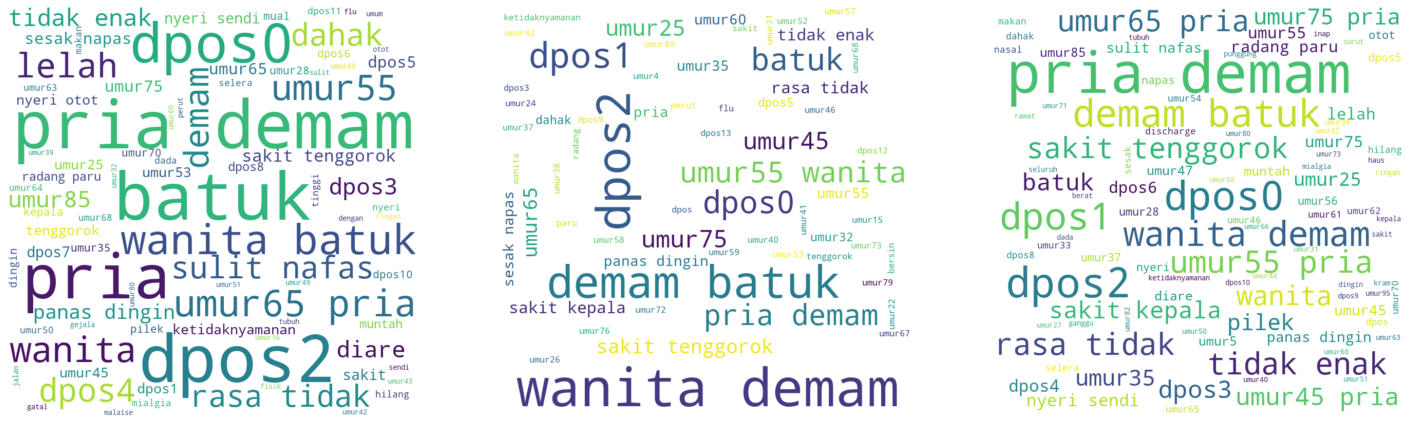

In [71]:
from wordcloud import WordCloud, STOPWORDS 
figure, axes = plt.subplots(1, 3, figsize = (25, 10))

top_words_str = " "
top_words_str = top_words_str.join(kataFinal[Y_kmeans == 0])
#stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(top_words_str) 
  
# plot the WordCloud image
plt.subplot(131)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

top_words_str = " "
top_words_str = top_words_str.join(kataFinal[Y_kmeans == 1])
#stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(top_words_str) 
  
plt.subplot(132)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


top_words_str = " "
top_words_str = top_words_str.join(kataFinal[Y_kmeans == 2])
#stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(top_words_str) 
  
plt.subplot(133)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

#dari wordcloud diatas selanjtunya bisa dilakukan kolaborasi dengan tim medis, untuk menentukan mana cluster yang termasuk triase merah, kuning, dan hijau

#selanjutnya save model 

In [0]:
import pickle 
pickle.dump(kmeans, open("model.sav", 'wb'))

In [74]:
w2vModel.save("simpan")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


#selanjutnya lakukan test menggunakan input dari user

In [0]:
katainput = ["umur37,wanita,batuk,dpos2", "umur75,pria,batuk,sesak napas,dpos2"]

In [82]:
sent_vectors = []; 
count_error = 0
for review in tqdm(katainput): 
  sent_vec = np.zeros(size)
  cnt_words =0; 
  for word in review.split(","):
    if word in w2vKata:
      print()
      vec = w2vModel.wv[word]
      sent_vec += vec
      cnt_words += 1
  if cnt_words != 0:
      sent_vec /= cnt_words
  sent_vectors.append(sent_vec)

100%|██████████| 2/2 [00:00<00:00, 307.52it/s]

In [0]:
inputan = np.array(sent_vectors)

In [0]:
cobbapred = kmeans.predict(inputan)

In [85]:
cobbapred

array([1, 0], dtype=int32)